# Configuration

### Calling the functions, libraries and objects

In [1]:
from utils.libraries import *
from utils.objects import *
from utils.functions import *
from definitions import *

### Setting up the configuration

In [2]:
## Date varialbes
years = 20
period="W"
cutoff_date=datetime.today().strftime('%Y-%m-%d')
Ymd_str = datetime.today().strftime('%Y%m%d')
Ym_str = datetime.today().strftime('%Y%m')
Y_str = datetime.today().strftime('%Y')
timeframe = 365*years
today = datetime.today()
end = today.strftime("%Y-%m-%d")
start = (today - dt.timedelta(days=timeframe)).strftime("%Y-%m-%d")
periods = period

## Config varialbes
ROOT_PATH = Path(ROOT_PATH)
config_paths = [
    "config\Market_Data_Config.csv",
    "config\Economic_Data_Config.csv",
    "config\Calc_Data_Config.csv"]
market_config = ROOT_PATH.joinpath(config_paths[0])
economic_config = ROOT_PATH.joinpath(config_paths[1]).abspath()
calc_config = ROOT_PATH.joinpath(config_paths[2]).abspath()
target_list = pd.read_csv(market_config, sep=";", header=0).loc[:, "Codigo"].to_list()
markets_used = pd.read_csv(market_config, sep=";", header=0).loc[:, "Codigo"].to_list()
markets_remove = pd.read_csv(market_config, sep=";", header=0).loc[:, "Market"].to_list()
# markets_used = ['SPY', 'GDX', 'BND']
target = "NASDAQ"
seed = 2  # ML random seed
extract = True
cross_val=5
medidas = ["mean", "median", "mode", "Min", "Percentil_25", "Percentil_75","Max", "var", "std", "skew", "kurt"]
extract = True

### Creating the necessary folders

In [3]:
## Paths variables
PARENT_DIR = "C:/Users/Joan Oliver/Documents/GitHub/Economic_Market_Forecasting/Economic_Market_Forecasting/EMF_webapp/src/"
DATA_FOLDER = "data/result/processed_data"
PREDICT_FOLDER = "data/result/prediction_data"
MODEL_FOLDER = "model"

data_path = PARENT_DIR+"/"+ DATA_FOLDER+"/"+ Y_str+"/"+ Ym_str+"/"+ Ymd_str
predict_path = PARENT_DIR+"/"+ PREDICT_FOLDER+"/"+ Y_str+"/"+ Ym_str+"/"+ Ymd_str
model_path = PARENT_DIR+"/"+ MODEL_FOLDER+"/"+ Y_str+"/"+ Ym_str+"/"+ Ymd_str
try:
    os.makedirs(data_path)
except:
    print("No folder created: "+DATA_FOLDER)
try:
    os.makedirs(predict_path)
except:
    print("No folder created: "+PREDICT_FOLDER)
try:
    os.makedirs(model_path)
except:
    print("No folder created: "+MODEL_FOLDER)

# Loading, extracting and preparing the data

In [4]:
    ### Extracting the EU economic and market data
    # ## Extracting European economic data
    # import eurostat
    # #### EU Yield Curve
    # yield_curve = eurostat.get_data_df("irt_euryld_d")
    # yld_crv = yield_curve.loc[(~yield_curve["bonds"].str.contains("AAA")) & (yield_curve["yld_curv"].str.contains("INS_FWD")) & (~yield_curve["maturity"].str.contains("M")),:]
    # yld_crv.set_index("maturity", inplace=True)
    # yld_crv["maturity_int"] = yld_crv.index.str.split("Y").str[1].astype(int)
    # yld_crv.sort_values("maturity_int",ascending=True, inplace=True)
    # yld_crv.drop(["maturity_int"], axis=1, inplace=True)
    # yld_crv = yld_crv.T
    # yld_crv = yld_crv.loc[yld_crv.index.drop(["freq",'yld_curv', 'bonds', 'geo\TIME_PERIOD'])]
    # yld_crv.index = pd.to_datetime(yld_crv.index)
    # yld_lst = []
    # for yld in yld_crv.columns:
    #     yld_lst.append(f"EU_yield_{yld}")
    # yld_crv.set_axis(yld_lst, axis=1, inplace=True)
    # intr_inds = pd.merge(indicators_df, yld_crv, left_index=True, right_index=True)
    # #### EU HICP
    # hicp = eurostat.get_data_df("PRC_HICP_MIDX")
    # hicp = hicp.loc[(hicp["geo\TIME_PERIOD"] == "EU") & (hicp["coicop"] == "CP00") & (hicp["unit"] == "I15"),:].T
    # hicp.drop(["freq", "geo\TIME_PERIOD", "coicop", "unit"], axis=0, inplace=True)
    # hicp.set_axis(["EU CPI"], axis=1, inplace=True)
    # hicp.index = pd.to_datetime(hicp.index)
    # intr_inds = pd.merge(intr_inds, hicp, left_index=True, right_index=True)
    # #### EU Government Deficit
    # gov_def = eurostat.get_data_df("GOV_10DD_EDPT1")
    # gov_def = gov_def.loc[(gov_def["geo\TIME_PERIOD"] == "EA20") & (gov_def["sector"] == "S13") & (gov_def["na_item"] == "B9") & (gov_def["unit"] == "PC_GDP"), :].T
    # gov_def.set_axis(gov_def.loc["geo\TIME_PERIOD"].values, axis=1, inplace=True)
    # gov_def.drop(["freq", "geo\TIME_PERIOD", "sector", "na_item", "unit"], axis=0, inplace=True)
    # gov_def.plot()

> Load the market data config
> Load the economic data config
> Setting up the indicator dictionaries
> Extracting the indicator data
   -->Extracting 10-Year Treasury Yield...
   -->Extracting 2-Year Treasury Yield...
   -->Extracting Federal Funds Effective Rate...
   -->Extracting 1-Month Treasury Yield...
   -->Extracting 3-Month Treasury Yield...
   -->Extracting 5-Year Treasury Yield...
   -->Extracting 20-Year Treasury Yield...
   -->Extracting 30-Year Treasury Yield...
   -->Extracting 15-Year Mortgage Rate...
   -->Extracting 30-Year Mortgage Rate...
   -->Extracting 10-Year Euro Gov Bond Yield...
   -->Extracting 3-Month Euro Gov Bond Yield...
   -->Extracting 3-Month China Gov Bond Yield...
   -->Extracting 10-Year India Gov Bond Yield...
   -->Extracting CPI...
   -->Extracting PPI...
   -->Extracting China CPI...
   -->Extracting Europe CPI...
   -->Extracting Unemployment Rate...
   -->Extracting GDP...
   -->Extracting Real GDP...
   -->Extracting Consumer Confidence Ind

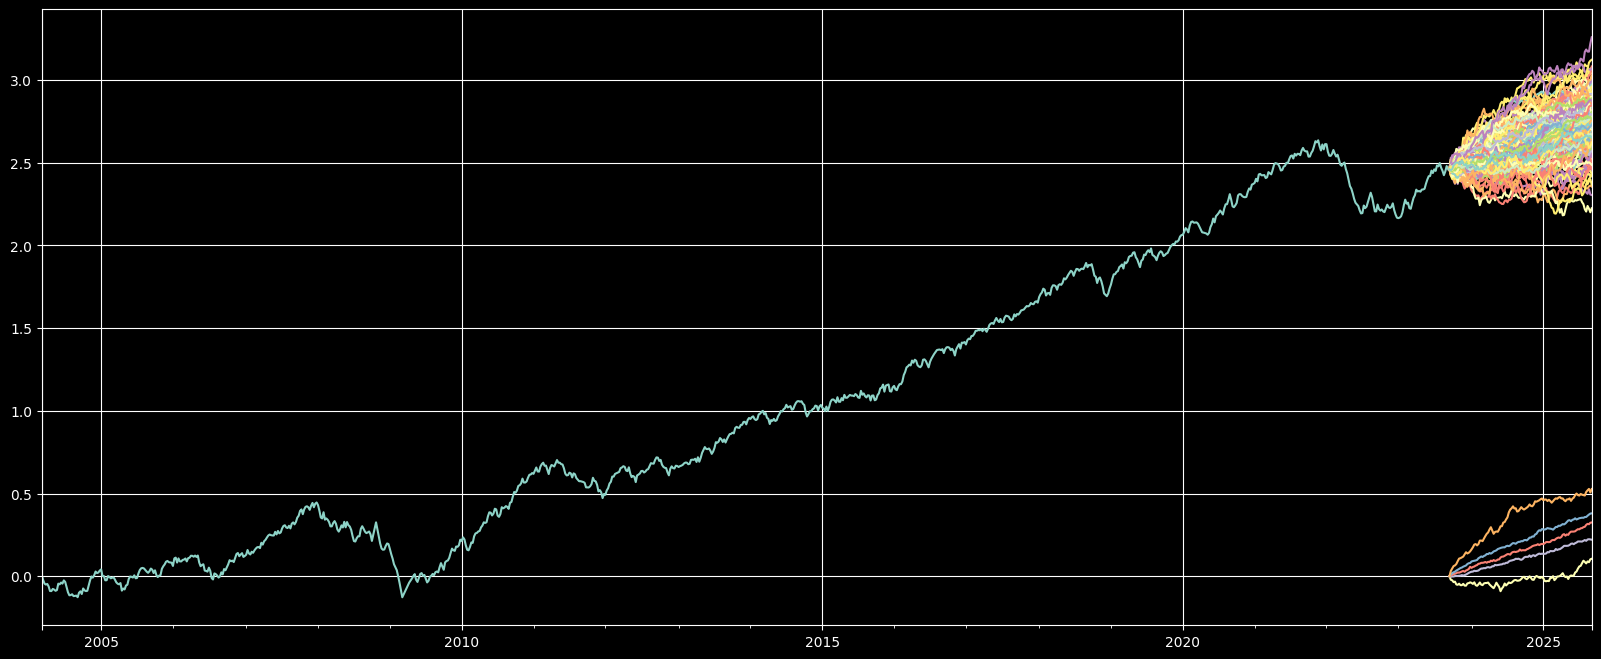

In [5]:
if extract == True:
    # Initialize the Economic Data Analyzer class
    eda = EconomicDataAnalyzer()
    # Load the Market Data
    print("> Load the market data config")
    market = eda.read_config(market_config)
    market_dict = eda.convert_to_dictionary(markets_used=markets_used)
    market_dict = market_dict['Market']
    # Load the economic data config
    print("> Load the economic data config")
    econ = eda.read_config(economic_config)
    fred_series_dict = eda.convert_to_dictionary(markets_used=None)
    fred_series_dict = fred_series_dict["Indicador"]
    calc = eda.read_config(calc_config)
    series_calc_dict = eda.convert_to_dictionary(markets_used=None)
    series_calc_dict = series_calc_dict["Indicador"]
    # Setting up the indicator dictionaries
    print("> Setting up the indicator dictionaries")
    indicators = {}
    for ind in list(econ["Tipo"].unique()):
        indicators[ind] = econ[econ["Tipo"] == ind]["Indicador"].to_list()
    if extract == True:
        # Extracting the indicator data
        print("> Extracting the indicator data")
        indicators_df = eda.indicator_extraction(fred_series_dict, series_calc_dict, root_path=ROOT_PATH)
        # Extracting the market data
        print("> Extracting the market data")
        stocks = list(market_dict.keys())
        market_df = eda.market_extraction(stocks, start, end, root_path=ROOT_PATH)
    else:
        print("No data extraction, reading data from data file")
        path = ROOT_PATH.joinpath('data', 'raw', 'indicators_df.csv')
        indicators_df = pd.read_csv(path)
        path = ROOT_PATH.joinpath('data', 'raw', 'market_df.csv')
        market_df = pd.read_csv(path)
    # Preparing the data
    ### Data cleaning
    # Cleaning the indicator data
    print("> Cleaning the indicator data")
    df_indicators, df_indicators_cum, df_indicators_diff, df_indicators_rets, df_indicators_limpio = eda.limpiar_indicators(
        df_indicators=indicators_df, 
        indicator_dict=indicators, 
        resample=periods, 
        fill_method="ffill", 
        start=start, 
        end=end, 
        root_path=ROOT_PATH)
    # Cleaning the market data
    print("> Cleaning market data")
    df_market, df_markets_rets, df_markets_cum, df_markets_diff  = eda.limpiar_markets(
        markets_dict=market_dict,
        df_markets=market_df,
        resample=periods, 
        fill_method="ffill", 
        start=start, 
        end=end, 
        root_path=ROOT_PATH)
    ### Merge indicator and market data
    list_market_dfs = [df_market,df_markets_rets,df_markets_cum,df_markets_diff]
    list_indicators_dfs = [df_indicators_limpio,df_indicators_rets,df_indicators_cum,df_indicators_diff]

    df_all_data, df_all_data_rets, df_all_data_cum, df_all_data_diff = eda.merge_data(list_market_dfs, list_indicators_dfs, root_path=ROOT_PATH)
    ### Feature Engineering
    ### Remove Outliers 
    df = eda.remove_outliers(df_all_data_rets)
    ### Adding features
    df_all_data["CAPE Ratio"] = df_all_data["SP500"]/(df_all_data["Corporate Profits"]*0.01)
    df["CAPE Ratio"] = df_all_data["SP500"]/(df_all_data["Corporate Profits"]*0.01)

    # df_all_data["CAPE Ratio"].plot()
    def trend_line(df, name, deg=2):
        coef = np.polyfit(range(0,len(df[name])), df[name], deg)
        x_trend = np.linspace(0,len(df[name]),len(df[name]))
        y_trend = np.polyval(coef, x_trend)
        df = pd.DataFrame(y_trend, index=df.index, columns=[name])
        return df

    # df_all_data = pd.DataFrame()
    df_all_data["SP_GDP"] = df_all_data["SP500"]/(df_all_data["GDP"]*.01)
    df_all_data["SP_GDP_trend"] = trend_line(df_all_data, "SP_GDP", deg=5)
    df["SP_GDP"] = df_all_data["SP500"]/(df_all_data["GDP"]*.01)
    df["SP_GDP_trend"] = trend_line(df_all_data, "SP_GDP", deg=5)

    # df_all_data = pd.DataFrame()
    std = df_all_data["SP_GDP"].std()
    df_all_data["SP_GDP_1std"] = df_all_data["SP_GDP_trend"] + (std)
    df["SP_GDP_1std"] = df_all_data["SP_GDP_trend"] + (std)

    # df_all_data = df_all_data.copy()
    # df_ts = df_all_data.loc[:,df_all_data.columns.str.contains(f"t-")]
    # df_all_data.drop(df_ts.columns,axis=1,inplace=True)
    for ma in df_all_data.columns:
        df_all_data[f"{ma}_MA"] = df_all_data[[ma]].rolling(window=52).mean().fillna(method="ffill").fillna(method="bfill")
        df_all_data[f"{ma}_std"] = df_all_data[[ma]].rolling(window=52).std().fillna(method="ffill").fillna(method="bfill")
        df_all_data[f"{ma}_trend"] = trend_line(df_all_data[[ma]], ma, deg=6)
        df_all_data[f"{ma}_MA_trend_dif"] = df_all_data[f"{ma}_trend"] - df_all_data[f"{ma}_MA"]
        
        df[f"{ma}_MA"] = df_all_data[[ma]].rolling(window=52).mean().fillna(method="ffill").fillna(method="bfill")
        df[f"{ma}_trend"] = trend_line(df_all_data[[ma]], ma, deg=6)
        df[f"{ma}_MA_trend_dif"] = df_all_data[f"{ma}_trend"] - df_all_data[f"{ma}_MA"]
    ### Creating lags in the data
    list_data_dfs = [df_all_data,df_all_data_rets,df_all_data_cum,df_all_data_diff]

    df_all_lag_data, df_all_lag_data_rets, df_all_lag_data_cum, df_all_lag_data_diff = eda.lag_data(list_data_dfs, target, n_lags=24)
    df = eda.remove_outliers(df_all_lag_data_rets)
    # Remove target columns from the data
    # for mkt in markets_remove:
    #     if mkt == target:
    #         pass
    #     else:
    #         for df_col in df.columns:
    #             if mkt in df_col:
    #                 try:
    #                     df.drop(df_col, axis=1, inplace=True)
    #                 except:
    #                     pass
    ### Feature Reduction
    ## Data Preprocessing
    econ_ml = Preprocessor()
    ### Feature Reduction
    #### Feature selection by correlation
    df_feat_corr = pd.DataFrame(df.corr().loc[target,:].sort_values(ascending=False))
    df_feat_relevant_corr = df_feat_corr[(df_feat_corr[target]>0.05) | (df_feat_corr[target]<-0.05)]
    df_feat_relevant_corr
    #### Indentifying the most important features
    ##### Splitting the data

    ##### Creating the baseline for feature importance
    baseline_models = econ_ml.define_baseline_models()

    X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df, target_col=target, test_size=0.15)
    model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)

    print("> Performing feature importance analysis")
    df_top_data, feature_importance, top_feature_importance, score = econ_ml.feature_importance(target=target, 
                                                                                                    df_data=df.loc[:cutoff_date],
                                                                                                    model=best_model,
                                                                                                    accepted_importance=0.85)
    #### Feature removal
    def feature_removal(df, df_top_data, model_results, best_model_name, score):
        best_model_score = model_results.loc[best_model_name,"score"]
        if score > best_model_score*.9:
            print("We choose to remove "+str(len(df.columns)-len(df_top_data.columns))+" features")
            df = df_top_data.copy()
        else:
            print("We choose to keep the original df with "+str(len(df_top_data.columns))+" features")
        return df

    df = feature_removal(df, df_top_data, model_results, best_model_name, score)
    ## Saving the processed data (ready for ML)
    df.to_csv(data_path+f"/processed_data_{target}_{Ymd_str}.csv", index=True, index_label="Date")

else:
    ## Reading the processed data
    df = pd.read_csv(data_path+f"/processed_data_{target}_{Ymd_str}.csv", index_col="Date")
    econ_ml = Preprocessor()
    baseline_models = econ_ml.define_baseline_models()




# Performing Machine Learning
### Pick the best model
## Data Preprocessing
econ_ml = Preprocessor()
X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df, target_col=target, test_size=0.15)
model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)
### Define the grids
params_RandomForest = {
    "n_estimators": [150, 250],
    "max_depth": [10,15,17],
    "max_features": ["sqrt", "log2", None],}
params_GradientBoosting = {
    'n_estimators': [150, 250],  # 50, 
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [5,10,17],}
params_XGBRegressor = {
    'n_estimators': [150, 250],  # 100
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [ 5, 10, 15],}
params_KNeighborsRegressor = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2],}
params_SVR = {
    'C': [0.1, 1.0, 10.0],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto', 0.1, 1.0],}
baseline_params = {
    "RandomForest":params_RandomForest,
    "GradientBoosting":params_GradientBoosting,
    "SVR":params_SVR,
    "KNeighborsRegressor":params_KNeighborsRegressor,
    "XGBRegressor":params_XGBRegressor}
def model_gridSearch(baseline_models,baseline_params,model_results,X_train,y_train,X_test,y_test,cross_val=5):
    y_test = y_test.copy()
    models_gridsearch = {}
    for name, model in baseline_models.items():
        if name in model_results.index.values:
            for mod,params in baseline_params.items():
                if name == mod:
                    models_gridsearch[mod] = GridSearchCV(model, params, cv=cross_val, scoring="neg_root_mean_squared_error", verbose=1, n_jobs=1)
                    models_gridsearch[mod].fit(X_train, y_train)
    best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]
    best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
    top_model = models_gridsearch[best_grids.loc[0,"Grid"]]
    return models_gridsearch, best_grids, top_model
### Performing Grid Search
models_gridsearch, best_grids, top_model = model_gridSearch(baseline_models,
                                                            baseline_params,
                                                            model_results,
                                                            X_train,
                                                            y_train,
                                                            X_test,
                                                            y_test,
                                                            cross_val=cross_val)
### Creating the prediction df
actual = pd.DataFrame(y_test)
actual.index = pd.to_datetime(actual.index)
pred = pd.DataFrame(top_model.best_estimator_.predict(X_test), index=pd.to_datetime(y_test.index), columns=[target + " pred"])
# Saving the best model
dump(top_model, model_path+f"\{target}_best_model_{Ymd_str}.joblib")
# plt.plot(actual.cumsum())
# plt.plot(pred.cumsum())
# Forecasting Feature Data
### Monte Carlo Simulation
# Calculating the stats
mean = df.mean()
var = df.var()
drift = mean - (.5 * var)
std = df.std()

# Setting the Monte Carlo Varuables
ind = 0
T = 104
num_ports = 100
date_range = pd.date_range(start=cutoff_date, periods=T, freq="W")

dict_future = {}
df_mean_future = pd.DataFrame(index=pd.date_range(start=cutoff_date, periods=T, freq="W"))
df_max_future = pd.DataFrame(index=pd.date_range(start=cutoff_date, periods=T, freq="W"))
df_min_future = pd.DataFrame(index=pd.date_range(start=cutoff_date, periods=T, freq="W"))

# Running through indicator columns to forecast
for ind, col in enumerate(df.columns):
    # Calculating the Weekly Returns
    weekly_rets = np.exp(drift.values[ind] + std.values[ind] * norm.ppf(np.random.rand(T, num_ports)))

    # Getting the most current weekly return (run it back if it's too small)
    n = -1
    S0 = 0
    while (S0 < 0.01) and (S0 > -0.01):
        S0 = df.cumsum().iloc[n,ind]
        n = n - 1
    # Creating the empty list and filling the first row
    price_list = np.zeros_like(weekly_rets)
    price_list[0] = S0

    # Performing Monte Carlo Situlation a 'num_ports' number of times
    for t in range(1,T):
        price_list[t] = price_list[t-1] * weekly_rets[t]
        dict_future[col] = pd.DataFrame(price_list,index=date_range)
### Working on the forecast data
##### Creating a list of forecasted futures
### Each item is a dataframe of a possible future of all indicators

list_futures = []
for n in range(0,num_ports):
    globals()["df_future_"+str(n)] = pd.DataFrame()
    for indicator in dict_future.keys():
        globals()["df_future_"+str(n)][indicator] = dict_future[indicator][n]
    list_futures.append(globals()["df_future_"+str(n)])
## Define a custom merging function
# def merge_columns_with_nans(row):
#     merged_values = []
#     for value in row:
#         if pd.notna(value):
#             merged_values.append(value)
#     return merged_values
##### Merging the forecasted data with the historical data
df.index = pd.to_datetime(df.index)
list_present_future = []
for n,future in enumerate(list_futures):
    globals()["df_future_"+str(n)].index = pd.to_datetime(globals()["df_future_"+str(n)].index)
    df_presentVSfuture = pd.concat([df,globals()["df_future_"+str(n)].pct_change()], axis=1, join="outer")
    globals()["df_present_future_"+str(n)] = pd.DataFrame()
    for col in df_presentVSfuture.columns:
        # df1 = df_presentVSfuture[[col]].apply(merge_columns_with_nans, axis=1).apply(pd.Series)
        # globals()["df_present_future_"+str(n)][col] = df1
        globals()["df_present_future_"+str(n)][col] = df_presentVSfuture[col].fillna(0).iloc[:,0] + df_presentVSfuture[col].fillna(0).iloc[:,1]
    list_present_future.append(globals()["df_present_future_"+str(n)])

### ML Prediction based on Monte Carlo Simulation
def best_prediction(models_gridsearch, best_grids, top_model, X_test, y_test):
    y_pred = models_gridsearch[best_grids.loc[0,"Grid"]].predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
    y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
    model_pred = pd.concat([y_test, y_pred], axis=1)
    return y_pred, y_test, model_pred

df_prediction = df[[target]].cumsum()
list_prediction = [df_prediction]
for n, present_future in enumerate(list_present_future):
    df_pred = present_future.fillna(method="ffill")
    
    test_size = T/len(df_pred)

    X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df_pred, target_col=target, test_size=test_size)
    # model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)
    y_pred = top_model.predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
    y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
    model_pred = pd.concat([y_test, y_pred], axis=1)
    model_pred.columns = [target+"_"+str(n),target+"_Prediction"+"_"+str(n)]
    latest_actual = df[[target]].cumsum().loc[df.index[-1]].values[0]
    model_pred = model_pred.cumsum()+latest_actual
    # df_prediction[target+"_"+str(n)] = model_pred[target+"_"+str(n)]
    # df_prediction[target+"_Prediction_"+str(n)] = model_pred[target+"_Prediction_"+str(n)]
    # df_prediction = pd.concat([df[target].cumsum(),model_pred.cumsum()+latest_actual], axis=1)
    list_prediction.append(model_pred)
df_all_predictions = pd.concat(list_prediction,axis=1)
df_all_predictions.to_csv(predict_path+f"\prediction_{target}_{Ymd_str}.csv", index=True, index_label="Date")
df_all_predictions.plot(figsize=(20,8), legend=False, grid=True)
# df_all_predictions
df_future_preds = (df_all_predictions.loc[:,df_all_predictions.columns.str.contains("Prediction")]-latest_actual).dropna()
for n in np.linspace(0,1,5):
    print(round(n,2))
    df_future_preds.quantile(round(n,2),axis=1).plot(figsize=(20,8), legend=False, grid=True)

# Performing Deep Neural Network

In [73]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
econ_ml = Preprocessor()
X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df, target_col=target, test_size=0.15)
# X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [74]:
def create_model(layers, activation, optimizer, loss, metrics):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train_scaled.shape[1], activation=activation))
            model.add(Dropout(0.5))
        else:
            model.add(Dense(nodes, activation=activation))
            model.add(Dropout(0.5))
    model.add(Dense(1))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

In [75]:
layers = [[64],[64, 32],[64, 128, 32], [64, 128, 256, 64], [64, 128, 256, 256, 128, 64]] # [64, 128, 256, 256, 128, 64]
activations = ['relu']
optimizers = ['adam']
losses = ['mean_squared_error']
metrics = ['mean_squared_error']
batch_size = [32, 64, 128]
epochs = [10, 15, 20, 30]
param_grid = dict(layers=layers, activation=activations, optimizer=optimizers, loss=losses, metrics=metrics,  batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [76]:
grid_results = grid.fit(X_train_scaled, y_train)

In [77]:
grid_results.best_params_

{'activation': 'relu',
 'batch_size': 32,
 'epochs': 30,
 'layers': [64, 128, 256, 64],
 'loss': 'mean_squared_error',
 'metrics': 'mean_squared_error',
 'optimizer': 'adam'}

In [78]:
grid_results.best_score_

-0.0003431330726016313

In [79]:
pred_y = grid.predict(X_test_scaled)

In [80]:
# Saving the best model
dump(grid, model_path+f"\{target}_best_DNN_model_{Ymd_str}.joblib")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-09-11 18:31:

['C:/Users/Joan Oliver/Documents/GitHub/Economic_Market_Forecasting/Economic_Market_Forecasting/EMF_webapp/src//model/2023/202309/20230910\\Financials_best_DNN_model_20230910.joblib']

<AxesSubplot:>

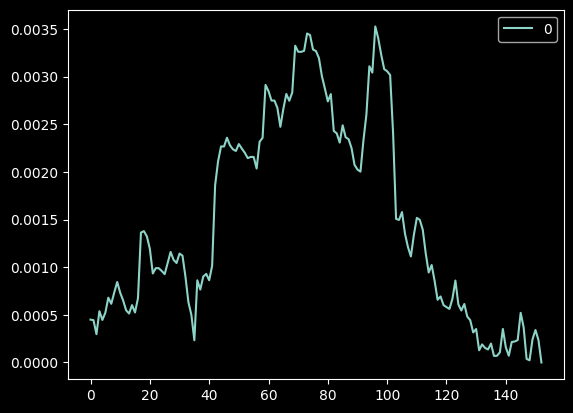

In [81]:
pd.DataFrame((pred_y-np.mean(pred_y))).cumsum().plot()

In [82]:
np.sqrt(mean_squared_error(y_test, pred_y))

0.018894921797239315

<AxesSubplot:xlabel='Date'>

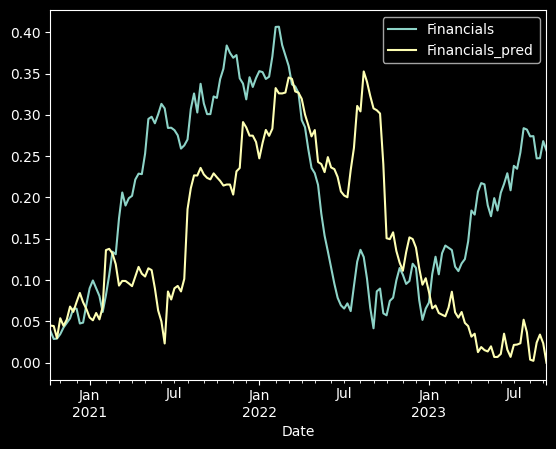

In [83]:
prediction = pd.DataFrame({f"{target}":y_test, f"{target}_pred":(pred_y-np.mean(pred_y))*100})
prediction.cumsum().plot()

In [84]:
prediction.to_csv(predict_path+f"\prediction_DNN_{target}_{Ymd_str}.csv", index=True, index_label="Date")

# Forecasting Indicator Performance - DNN

### Monte Carlo Simulation

In [85]:
# Calculating the stats
mean = df.mean()
var = df.var()
drift = mean - (.5 * var)
std = df.std()

# Setting the Monte Carlo Varuables
ind = 0
T = 104
num_ports = 100
date_range = pd.date_range(start=cutoff_date, periods=T, freq="W")

dict_future = {}
df_mean_future = pd.DataFrame(index=pd.date_range(start=cutoff_date, periods=T, freq="W"))
df_max_future = pd.DataFrame(index=pd.date_range(start=cutoff_date, periods=T, freq="W"))
df_min_future = pd.DataFrame(index=pd.date_range(start=cutoff_date, periods=T, freq="W"))

# Running through indicator columns to forecast
for ind, col in enumerate(df.columns):
    # Calculating the Weekly Returns
    weekly_rets = np.exp(drift.values[ind] + std.values[ind] * norm.ppf(np.random.rand(T, num_ports)))

    # Getting the most current weekly return (run it back if it's too small)
    n = -1
    S0 = 0
    while (S0 < 0.01) and (S0 > -0.01):
        S0 = df.cumsum().iloc[n,ind]
        n = n - 1
    # Creating the empty list and filling the first row
    price_list = np.zeros_like(weekly_rets)
    price_list[0] = S0

    # Performing Monte Carlo Situlation a 'num_ports' number of times
    for t in range(1,T):
        price_list[t] = price_list[t-1] * weekly_rets[t]
        dict_future[col] = pd.DataFrame(price_list,index=date_range)

KeyboardInterrupt: 

### Working on the forecast data

##### Creating a list of forecasted futures

In [ ]:
### Each item is a dataframe of a possible future of all indicators

list_futures = []
for n in range(0,num_ports):
    globals()["df_future_"+str(n)] = pd.DataFrame()
    for indicator in dict_future.keys():
        globals()["df_future_"+str(n)][indicator] = dict_future[indicator][n]
    list_futures.append(globals()["df_future_"+str(n)])

In [ ]:
## Define a custom merging function
# def merge_columns_with_nans(row):
#     merged_values = []
#     for value in row:
#         if pd.notna(value):
#             merged_values.append(value)
#     return merged_values

##### Merging the forecasted data with the historical data

In [ ]:
df.index = pd.to_datetime(df.index)
list_present_future = []
for n,future in enumerate(list_futures):
    globals()["df_future_"+str(n)].index = pd.to_datetime(globals()["df_future_"+str(n)].index)
    df_presentVSfuture = pd.concat([df,globals()["df_future_"+str(n)].pct_change()], axis=1, join="outer")
    globals()["df_present_future_"+str(n)] = pd.DataFrame()
    for col in df_presentVSfuture.columns:
        # df1 = df_presentVSfuture[[col]].apply(merge_columns_with_nans, axis=1).apply(pd.Series)
        # globals()["df_present_future_"+str(n)][col] = df1
        globals()["df_present_future_"+str(n)][col] = df_presentVSfuture[col].fillna(0).iloc[:,0] + df_presentVSfuture[col].fillna(0).iloc[:,1]
    list_present_future.append(globals()["df_present_future_"+str(n)])

In [ ]:
def best_prediction(models_gridsearch, best_grids, top_model, X_test, y_test):
    y_pred = models_gridsearch[best_grids.loc[0,"Grid"]].predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
    y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
    model_pred = pd.concat([y_test, y_pred], axis=1)
    return y_pred, y_test, model_pred

In [ ]:
def dnn_prediction(X_test, top_model):
    y_pred = grid.predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
    y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
    model_pred = pd.concat([y_test, y_pred], axis=1)
    return y_pred, y_test, model_pred

In [86]:
df_prediction = df[[target]].cumsum()
list_prediction = [df_prediction]
for n, present_future in enumerate(list_present_future):
    df_pred = present_future.fillna(method="ffill")
    
    test_size = T/len(df_pred)

    X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df_pred, target_col=target, test_size=test_size)
    # model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)
    pred_y = grid.predict(X_test)
    y_pred = pd.DataFrame((pred_y-np.mean(pred_y))*100, columns=[target+"_Prediction"],index=y_test.index)
    y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
    model_pred = pd.concat([y_test, y_pred], axis=1)
    model_pred.columns = [target+"_"+str(n),target+"_Prediction"+"_"+str(n)]
    latest_actual = df[[target]].cumsum().loc[df.index[-1]].values[0]
    model_pred = model_pred.cumsum()+latest_actual
    # df_prediction[target+"_"+str(n)] = model_pred[target+"_"+str(n)]
    # df_prediction[target+"_Prediction_"+str(n)] = model_pred[target+"_Prediction_"+str(n)]
    # df_prediction = pd.concat([df[target].cumsum(),model_pred.cumsum()+latest_actual], axis=1)
    list_prediction.append(model_pred)
df_all_predictions = pd.concat(list_prediction,axis=1)

<AxesSubplot:>

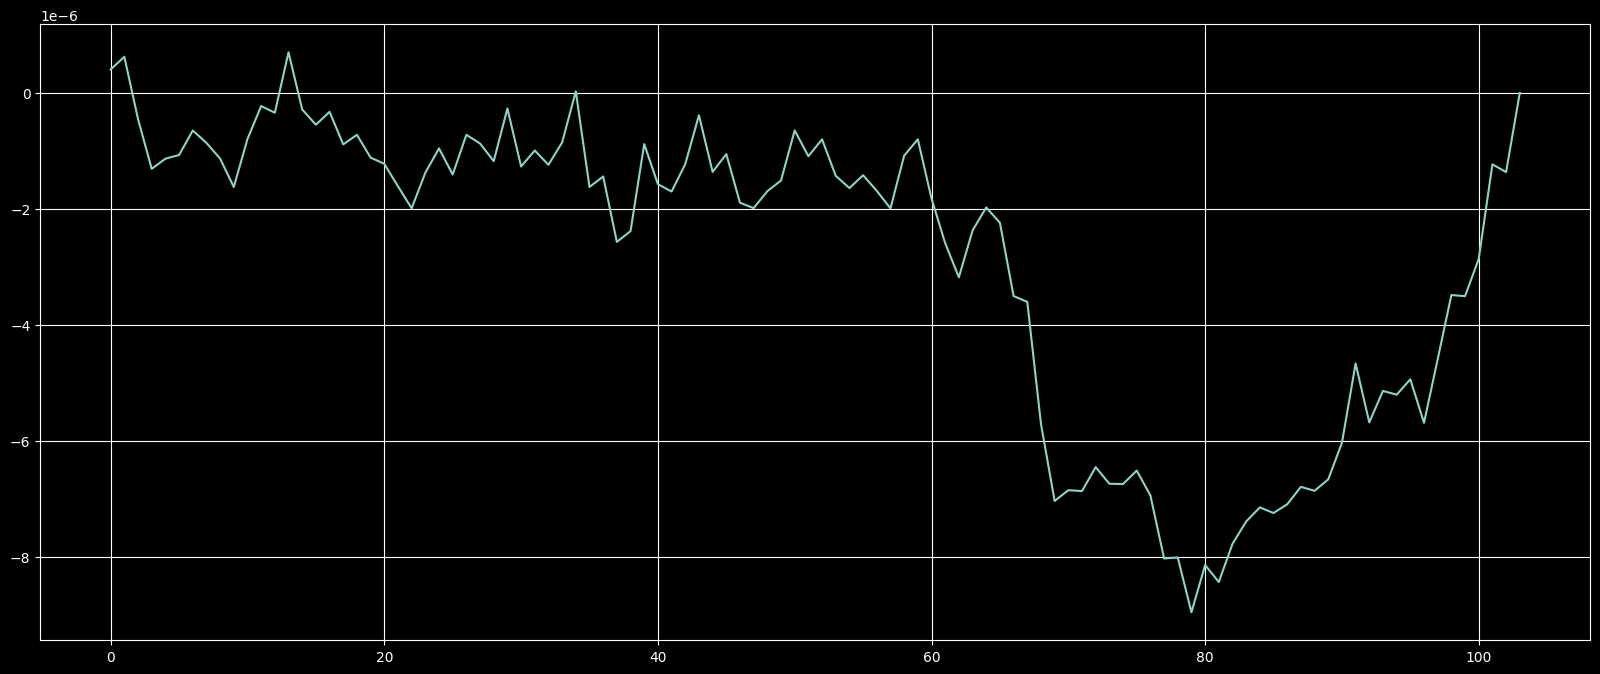

In [95]:
pd.DataFrame(pred_y-np.mean(pred_y)).cumsum().plot(figsize=(20,8), legend=False, grid=True)

<AxesSubplot:>

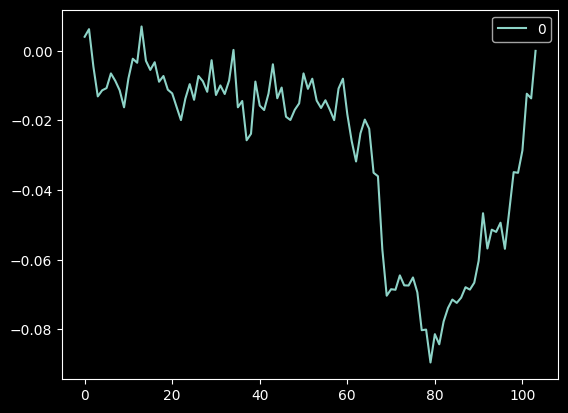

In [87]:
pd.DataFrame((pred_y-np.mean(pred_y))*10000).cumsum().plot()

In [96]:
df_all_predictions.to_csv(predict_path+f"\prediction_DNN_{target}_{Ymd_str}.csv", index=True, index_label="Date")

In [97]:
df_all_predictions = pd.read_csv(r"C:\Users\Joan Oliver\Documents\GitHub\Economic_Market_Forecasting\Economic_Market_Forecasting\EMF_webapp\src\data\result\prediction_data\2023\202309\20230910\prediction_Financials_20230910.csv", index_col="Date")

In [113]:
latest_actual

2.2112165537680415

<AxesSubplot:xlabel='Date'>

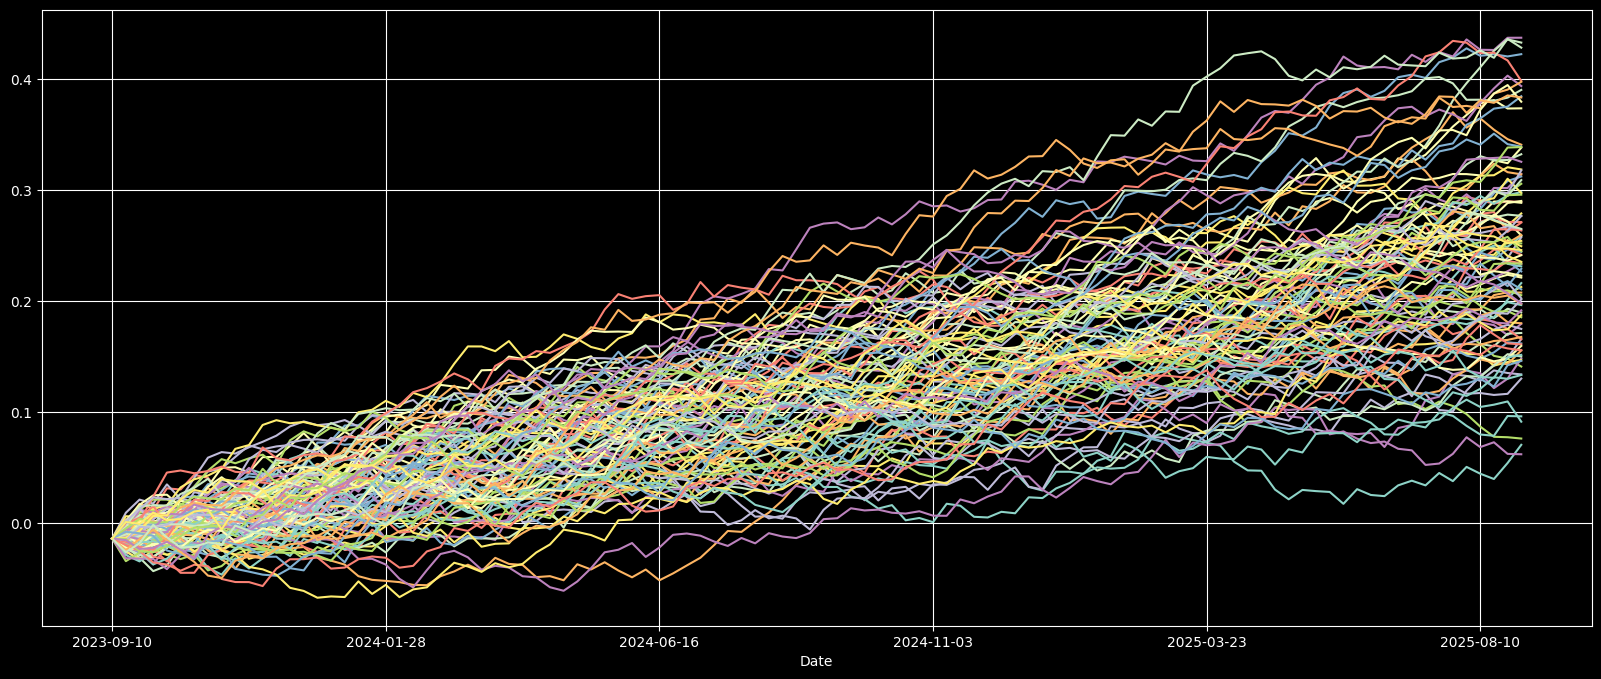

In [114]:
(df_all_predictions.loc['2023-09-10':,(df_all_predictions.columns.str.contains("Prediction"))] - latest_actual).plot(figsize=(20,8), legend=False, grid=True)
# df_all_predictions

In [105]:
df_all_predictions

,Financials,Financials_0,Financials_Prediction_0,Financials_1,Financials_Prediction_1,Financials_2,Financials_Prediction_2,Financials_3,Financials_Prediction_3,Financials_4,...,Financials_95,Financials_Prediction_95,Financials_96,Financials_Prediction_96,Financials_97,Financials_Prediction_97,Financials_98,Financials_Prediction_98,Financials_99,Financials_Prediction_99
Date,,,,,,,,,,,,,,,,,,,,,
2004-03-07,0.019411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-14,-0.009807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-21,-0.014457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-28,-0.025719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-04,-0.003973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-03,NaN,2.382901,2.445623,2.540664,2.578622,2.743936,2.432528,2.396123,2.505034,2.025956,...,2.279867,2.580458,2.828125,2.519814,2.590997,2.423454,2.490906,2.490289,2.302238,2.462417
2025-08-10,NaN,2.385400,2.455382,2.524410,2.589009,2.755522,2.432723,2.405487,2.501914,2.043388,...,2.284209,2.591878,2.795239,2.518240,2.609737,2.429262,2.470381,2.488694,2.285200,2.458842
2025-08-17,NaN,2.375522,2.461108,2.519216,2.592013,2.729195,2.438496,2.405165,2.498887,2.011943,...,2.275713,2.589539,2.820399,2.532550,2.617498,2.426079,2.475411,2.484237,2.287107,2.458300


In [ ]:
df_future_preds = (df_all_predictions.loc[:,df_all_predictions.columns.str.contains("Prediction")]-latest_actual).dropna()
for n in np.linspace(0,1,5):
    print(round(n,2))
    df_future_preds.quantile(round(n,2),axis=1).plot(figsize=(20,8), legend=False, grid=True)

In [ ]:
df_all_predictions.loc[:,df_all_predictions.columns.str.contains("_")].plot()

In [ ]:
pd.conco((df_all_predictions.loc[:,df_all_predictions.columns.str.contains("Prediction")]))

In [ ]:
df1 = pd.read_csv(r"C:\Users\Joan Oliver\Documents\GitHub\Economic_Market_Forecasting\Economic_Market_Forecasting\EMF_webapp\src\data\result\prediction_data\prediction_SP500_20230812.csv", 
                    index_col="Date")
df2 = pd.read_csv(r"C:\Users\Joan Oliver\Documents\GitHub\Economic_Market_Forecasting\Economic_Market_Forecasting\EMF_webapp\src\data\result\prediction_data\prediction_Gold_20230812.csv", 
                    index_col="Date")
df3 = pd.read_csv(r"C:\Users\Joan Oliver\Documents\GitHub\Economic_Market_Forecasting\Economic_Market_Forecasting\EMF_webapp\src\data\result\prediction_data\prediction_CorporateBonds_20230812.csv", 
                    index_col="Date")

In [ ]:
df1

In [ ]:
df_future_preds = (df1.loc[:,df1.columns.str.contains("Prediction")]-latest_actual).dropna()
for n in np.linspace(0,1,5):
    print(round(n,2))
    df_future_preds.quantile(round(n,2),axis=1).plot(figsize=(20,8), legend=False, grid=True)

# Upload to DB

In [ ]:
import psycopg2

table_df = df.copy()
table_df.columns = [col.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "") for col in table_df.columns]
table_name = f"{target}_data"


conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="CFALevel12018",
    port=5432
)
cur = conn.cursor()

cur.execute(f"""CREATE TABLE IF NOT EXISTS {table_name} (
        date CHAR PRIMARY KEY
);
""")

for col in table_df:
    try:
        cur.execute(
            f"""
            ALTER TABLE {table_name}
            ADD COLUMN col_{col} FLOAT;
            """
        )
    except:
        pass

conn.commit()
# cur.close()
# conn.close()

In [ ]:
def check_date_exists(cur, date, table_name):
    query = (f"""SELECT date FROM {table_name} date = %s;""")
    cur.execute(query, (date,))
    return cur.fetchone() is not None
def update_row(i, cur, table_name):
    for col in table_df.columns:
        query = (f"""UPDATE {table_name} SET {col} = %s WHERE date = %s;""")
        cur.execute(query, (table_df["Date"][i],))
        conn.commit()
def insert_row(row, cols, s_str, table_name):
    query = (f"""INSERT INTO {table_name} ({cols})VALUES ({s_str});""")
    cur.execute(query, (row.name,))
    conn.commit()

In [ ]:
for i, row in table_df.iterrows():
    print(row.name)
    print(cols)
    insert_row(row, cols, s_str, table_name)

In [ ]:
s_list = []
for col in df.columns:
    s_list.append(f"%s")
s_str = ", ".join(s_list)

In [ ]:
cols = ", ".join(df.columns)

In [ ]:
tmp_df = pd.DataFrame(columns=table_df.columns)
cols = ", ".join(table_df.columns)
s_list = []
for col in df.columns:
    s_list.append(f"%s")
s_str = ", ".join(s_list)

cur = conn.cursor()
for i, row in table_df.iterrows():
    if check_date_exists(cur, row.name, table_name):
        update_row(i, cur, table_name)
    else:
        tmp_df = tmp_df.append(row)
        insert_row(row, cols, s_str, table_name)
    # print(row)

In [ ]:
def lstm_model(epochs,batch_size,validation_split):
    # LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=160, return_sequences=True, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    lstm_model.add(LSTM(units=480, return_sequences=True, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    lstm_model.add(LSTM(256))
    lstm_model.add(Dense(units=1))
    lstm_model.compile(optimizer='adam', loss='mse')
    lstm_model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return lstm_model

def gru_model(epochs,batch_size,validation_split):
    # gru model
    gru_model = Sequential()
    gru_model.add(GRU(units=64, return_sequences=True, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    gru_model.add(GRU(32))
    gru_model.add(Dense(units=1))
    gru_model.compile(optimizer='adam', loss='mse')
    gru_model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return gru_model

def cnn_model(epochs,batch_size,validation_split):
    # cnn model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(units=1))
    cnn_model.compile(optimizer='adam', loss='mse')
    cnn_model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return cnn_model

In [ ]:
models = {
    "LSTM":lstm_model(epochs=15,batch_size=64,validation_split=0.2),
    # "GRU":gru_model(epochs=15,batch_size=16,validation_split=0.2),
    # "CNN":cnn_model(epochs=15,batch_size=16,validation_split=0.2)
}

In [ ]:
models['LSTM'].summary()

In [ ]:
model_eval = {}
for name, model in models.items():
    if name != "CNN":
        loss_score = model.evaluate(X_test, y_test)
        print(f"Evaluate the model: {name}: {loss_score}")
        model_eval[name] = loss_score
    # model.evaluate(X_test, y_test)
model_eval_df = pd.DataFrame(model_eval.values(), index=model_eval.keys()).sort_values(by=0, ascending=True)

In [ ]:
pred = pd.DataFrame(models["LSTM"].predict(X_test), index=y_test.index)*100
pred_vol = (pred-pred.iloc[-1].values)*100

In [ ]:
print(pred_vol.std())
print(y_test.std())

In [ ]:
((X_test.prediction*100)-0.17).cumsum().plot()
y_test.cumsum().plot()

In [ ]:
for name, model in models.items():
    if name != "CNN":
        print(f"Review of model: {name}")
        try:
            df_history = pd.DataFrame({"Loss":model.history.history['loss'], "Val_Loss":model.history.history['val_loss']})
            df_history.plot(figsize=(10, 6), title=name)
        except:
            pass
        pred = model.predict(X_test)
        predictions = pd.DataFrame(pred, index=y_test.index)
        predictions.index = pd.to_datetime(predictions.index)
        predictions.columns = [target+"_Pred"]

        model.save(f'models\models\{name}_best_model.h5')
        model.save_weights(f'models\weights\{name}_best_model.h5') 

        y_test.index = pd.to_datetime(y_test.index)
        EMF_forecast = pd.concat([y_test, predictions], axis=1).cumsum()
        # print(model.summary())
        plt.figure(figsize=(10, 6))
        plt.title(f"{name} -> {X_test.index[0]} - {X_test.index[-1]}")
        plt.plot(EMF_forecast, label=EMF_forecast.columns)
        plt.legend()
model_eval_df.columns = ["mse"]
model_eval_df["rmse"] = np.sqrt(model_eval_df["mse"])
all_model_results = pd.concat([model_eval_df,model_results], axis=0).sort_values(by='rmse', ascending=True)
best_model = all_model_results.iloc[0]
if name == best_model.name:
    EMF_forecast.to_csv(prediction_path+f"/EMF_forecast_{target}.csv")

# Testing

In [ ]:
for present_future in list_present_future:
    test_size = T/len(present_future)
    X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=present_future, target_col=target, test_size=test_size)
    model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)


In [ ]:
df = df_future_mean.fillna(method="ffill")

In [ ]:
## Performing Machine Learning
### Pick the best model

test_size = T/len(df)

X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df, target_col=target, test_size=test_size)
model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)

In [ ]:
### Define the grids
params_RandomForest = {
    "n_estimators": [120],
    "max_depth": [10,15,17],
    "max_features": ["sqrt", 3, 4]                          
    }

params_GradientBoosting = {
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],  
    }

params_XGBRegressor = {
    'n_estimators': [100, 150, 250],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [ 5, 7, 11],
    # 'subsample': [0.8, 1.0],
    # 'max_leaf_nodes': [32, 64, 108]
    }

params_KNeighborsRegressor = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2],  
    }

params_SVR = {
    'C': [0.1, 1.0, 10.0],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto', 0.1, 1.0],  
    }

baseline_params = {
    "RandomForest":params_RandomForest,
    "GradientBoosting":params_GradientBoosting,
    "SVR":params_SVR,
    "KNeighborsRegressor":params_KNeighborsRegressor,
    "XGBRegressor":params_XGBRegressor
}
def model_gridSearch(baseline_models,baseline_params,model_results,X_train,y_train,X_test,y_test,cross_val=5):
    y_test = y_test.copy()
    models_gridsearch = {}
    for name, model in baseline_models.items():
        if name in model_results.index.values:
            for mod,params in baseline_params.items():
                if name == mod:
                    models_gridsearch[mod] = GridSearchCV(model, params, cv=cross_val, scoring="neg_root_mean_squared_error", verbose=1, n_jobs=1)
                    models_gridsearch[mod].fit(X_train, y_train)
    best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]
    best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
    top_model = models_gridsearch[best_grids.loc[0,"Grid"]]
    return models_gridsearch, best_grids, top_model

def best_prediction(models_gridsearch, best_grids, top_model, X_test, y_test):
    y_pred = models_gridsearch[best_grids.loc[0,"Grid"]].predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
    y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
    model_pred = pd.concat([y_test, y_pred], axis=1)
    return y_pred, y_test, model_pred

In [ ]:
print("> Performing Machine Learning")
print(">>> Performing Grid Search")
models_gridsearch, best_grids, top_model = model_gridSearch(baseline_models,baseline_params,model_results,X_train,y_train,X_test,y_test,cross_val=cross_val)

In [ ]:
dict_future.keys()

In [ ]:
print(">>> Performing Prediction")
for indicator in dict_future.keys():
    y_pred, y_test, model_pred = best_prediction(models_gridsearch, best_grids, top_model, X_test, y_test)

In [ ]:
# Find the 50th percentile of the monte carlo simulations
dict_future["SP500"].reindex(dict_future["SP500"].iloc[-1].sort_values(ascending=False).index, axis=1).iloc[:,int(num_ports/2)]

In [ ]:
try:
    X_test.index = pd.to_datetime(X_test.index)
except:
    pass
full_test = pd.concat([model_pred, X_test], axis=1)
print(">>> Saving the best model and the data")
# Save the best model
dump(top_model, r'C:\Users\Joan Oliver\Documents\GitHub\Economic_Market_Forecasting\Economic_Market_Forecasting\EMF_webapp\src\model'+f"\{target}_best_model.joblib")
# Save the data
model_pred.to_csv(data_path+f"\{target}_data.csv")

In [ ]:
latest_actual = df[[target]].cumsum().loc[model_pred.index[0]].values[0]
pd.concat([df[target].cumsum(),model_pred.cumsum()+latest_actual], axis=1).plot()

In [ ]:
df_max = df_future_max.fillna(method="ffill")
## Performing Machine Learning
### Pick the best model

test_size = T/len(df_max)

X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df_max, target_col=target, test_size=test_size)
model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)

In [ ]:
y_pred = models_gridsearch[best_grids.loc[0,"Grid"]].predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
model_pred_max = pd.concat([y_test, y_pred], axis=1)
latest_actual = df[[target]].cumsum().loc[model_pred_max.index[0]].values[0]
df_max_prediction = pd.concat([df[target].cumsum(),model_pred_max.cumsum()+latest_actual], axis=1)
df_max_prediction.plot()

In [ ]:
df_min = df_future_min.fillna(method="ffill")

test_size = T/len(df_min)

X_train, X_test, y_train, y_test = econ_ml.train_test_split_data(data=df_min, target_col=target, test_size=test_size)
model_results, baseline_preds, best_model, best_model_name = econ_ml.baseline_ml(target, X_train, X_test, y_train, y_test, baseline_models)
y_pred = models_gridsearch[best_grids.loc[0,"Grid"]].predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=[target+"_Prediction"],index=y_test.index)
y_pred.index, y_test.index = pd.to_datetime(y_test.index), pd.to_datetime(y_test.index)
model_pred_min = pd.concat([y_test, y_pred], axis=1)
latest_actual = df[[target]].cumsum().loc[model_pred_min.index[0]].values[0]

df_min_prediction = pd.concat([df[target].cumsum(),model_pred_min.cumsum()+latest_actual], axis=1)
df_min_prediction.plot()